# Exploratory Data Analysis

In this file, we explore the data, check if there is any missing value and abnormal data, and look at the distributions of and the correlations between the variables. A short summary is provided at the end explaining what action needs to be taken based on this analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
train = pd.read_csv('../data/raw_train.csv')
test = pd.read_csv('../data/raw_test.csv')

## Descriptive statistics

In [47]:
train.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156295
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363604
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,-1.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446292,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [96]:
test.describe()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight
count,12002.000000,12002.000000,12002.000000,12000.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,11914.000000,12002.000000,12002.000000,11988.000000,11999.000000,12002.000000,12002.000000,12002.000000
mean,15045.335111,43.525162,0.482086,0.715167,73.702966,37331.504833,0.698134,0.576737,0.446842,49762.387269,0.494918,0.238711,49.770122,0.601066,5016.502211,4.969331,0.995001,22925.335594,22860.701764
std,8661.251912,12.201298,0.499700,0.451354,15.378967,2926.069309,0.459087,0.494097,0.497187,29133.180765,0.956002,0.426313,33.581191,0.489699,2257.041870,2.227267,0.816753,12108.888412,12198.142508
min,2.000000,19.000000,0.000000,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,471.363743,0.000000,0.000000,2261.507903,2583.428985
25%,7532.250000,35.000000,0.000000,0.000000,66.000000,35550.000000,0.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,18.000000,0.000000,3367.182392,3.000000,0.000000,14087.559950,13832.434587
50%,15055.500000,43.000000,0.000000,1.000000,76.000000,37606.000000,1.000000,1.000000,0.000000,50027.000000,0.000000,0.000000,50.000000,1.000000,4673.058955,5.000000,1.000000,20642.029325,20508.293695
75%,22559.500000,51.000000,1.000000,1.000000,85.000000,39313.000000,1.000000,1.000000,1.000000,80036.750000,1.000000,0.000000,82.000000,1.000000,6295.292309,6.000000,2.000000,29293.641235,29205.553660
max,29998.000000,278.000000,1.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,14.000000,2.000000,106991.684500,101818.964200


## Missing values

Let's look at the number of missing values for each feature.

In [41]:
train.isnull().sum(axis=0).sort_values(ascending=False)

witness_present_ind        132
claim_est_payout            17
age_of_vehicle               8
marital_status               5
fraud                        0
claim_date                   0
age_of_driver                0
gender                       0
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
accident_site                0
claim_day_of_week            0
vehicle_weight               0
past_num_of_claims           0
liab_prct                    0
channel                      0
policy_report_filed_ind      0
vehicle_category             0
vehicle_price                0
vehicle_color                0
claim_number                 0
dtype: int64

In [42]:
test.isnull().sum(axis=0).sort_values(ascending=False)

witness_present_ind        88
claim_est_payout           14
age_of_vehicle              3
marital_status              2
vehicle_weight              0
zip_code                    0
age_of_driver               0
gender                      0
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
claim_day_of_week           0
claim_date                  0
vehicle_color               0
accident_site               0
past_num_of_claims          0
liab_prct                   0
channel                     0
policy_report_filed_ind     0
vehicle_category            0
vehicle_price               0
claim_number                0
dtype: int64

Most of the missing values are in witness_present_ind and claim_set_payout. None of the variable has a significant percentage of missing values, but we can't just throw these out, because there are missing values in the testing data set. We will do some very basic imputation.

## Barplot and density plots

Below I will use the two functions below plot the features from train and test datasets side-by-side to see if the observations of the two datasets come from the same distribution.

In [23]:
def countplot(feature):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
    for i, df_name in enumerate(['train', 'test']):
        df = eval(df_name)
        sns.countplot(df[feature], ax=ax[i])
        ax[i].title.set_text(df_name)
        for p in ax[i].patches:
            height = p.get_height()
            ax[i].text(p.get_x() + p.get_width() / 2., height + 3, 
                    '{:1.2f}%'.format(height / df.shape[0] * 100), ha='center') 
    fig.tight_layout()

In [22]:
def distplot(feature):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
    for i, df_name in enumerate(['train', 'test']):
        df = eval(df_name)
        sns.distplot(df[feature], ax=ax[i])
        ax[i].title.set_text(df_name)
    fig.tight_layout()

### age_of_driver

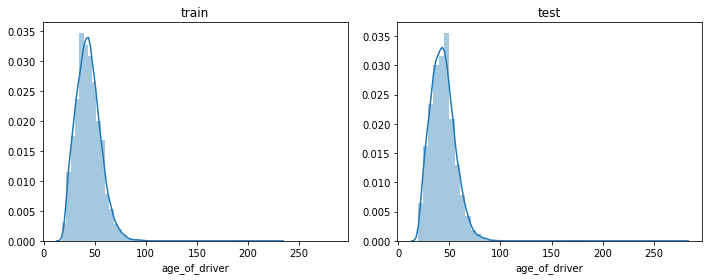

In [25]:
distplot('age_of_driver')

It seems like we have claimers with age larger than 100, which seems unusually high.

### marital_status

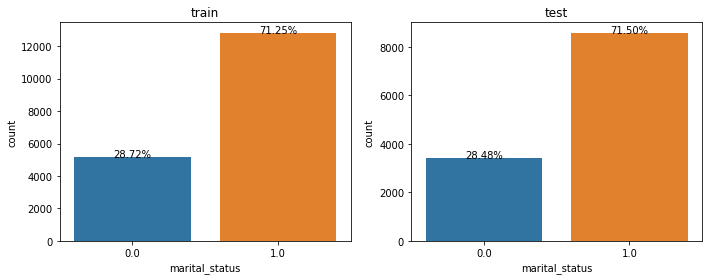

In [40]:
countplot('marital_status')

### gender

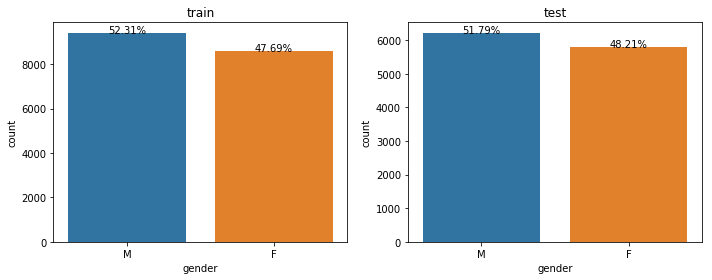

In [24]:
countplot('gender')

### safty_rating

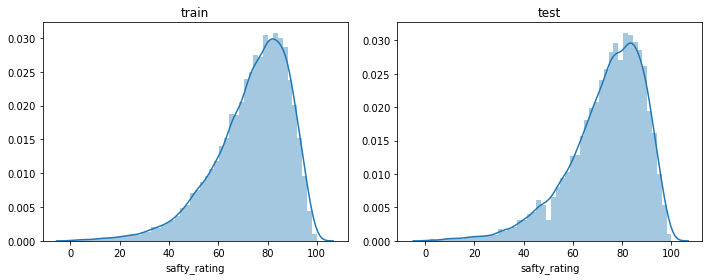

In [26]:
distplot('safty_rating')

### annual_income

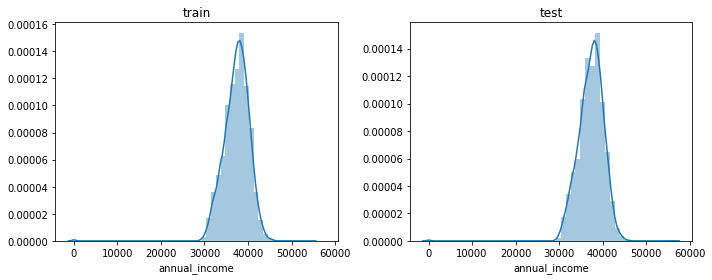

In [27]:
distplot('annual_income')

It seems like there is some abnormal data here too, as some people have income below 0.

### high_education_ind

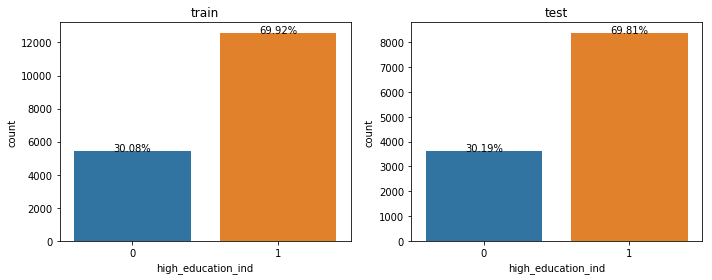

In [28]:
countplot('high_education_ind')

### address_change_ind

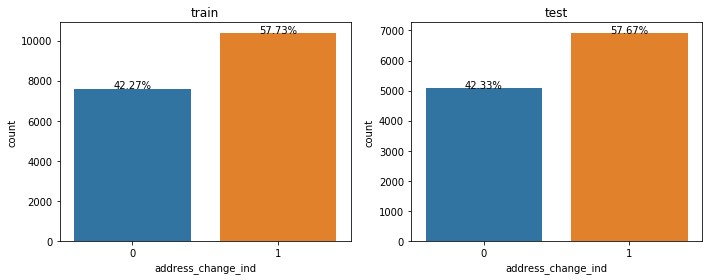

In [29]:
countplot('address_change_ind')

### living_status

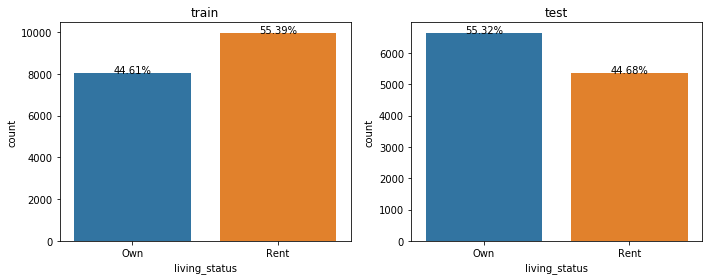

In [30]:
countplot('living_status')

### zip_code

Check if all the zip codes in the test set show up in the training set

In [46]:
set(train['zip_code']) == set(test['zip_code'])

True

In [123]:
train['zip_code'].unique()

array([80006, 15021, 20158, 15024, 50034, 50047, 15001, 80016, 85032,
       15057, 50033, 80003, 15035, 85023, 15020, 20135, 20101, 15056,
       80101, 50038, 85040, 80110, 85020, 20141, 20111, 80021, 80030,
       50054, 80013, 85028, 85064, 80015, 20143, 50036, 15053, 85067,
       85031, 85079, 20132, 15009, 80024, 20165, 15060, 15018, 80010,
       85029, 50021, 15010, 85074, 80020, 50007, 20130, 80106, 85038,
       85054, 50049, 85060, 15014, 50035, 15003, 85072, 20129, 50012,
       85027, 20104, 85036, 80025, 80035, 15037, 50043, 80002, 80022,
       50046, 85022, 85062, 15006, 85034, 50025, 80109, 15012, 80047,
       85037, 20152, 15032, 15022, 85082, 80023, 50052, 85024, 50013,
       80027, 50050, 80046, 85030, 50022, 85053, 20118, 15025, 15030,
       50002, 80014, 80033, 50040, 50003, 20120, 50029, 20106, 85001,
       85080, 50057, 20159, 85042, 80005, 85008, 20163, 20103, 80018,
       20147, 20107, 20109, 80031, 15005, 50009, 80026, 80012, 85010,
       50041, 20115,

Instead of using the zip code as a categorical variable, we may get more information if we convert it into continuous variables such as latitude and longitude.

### past_num_of_claims

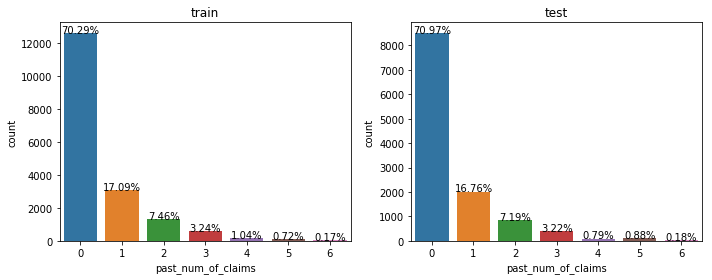

In [31]:
countplot('past_num_of_claims')

### witness_present_ind

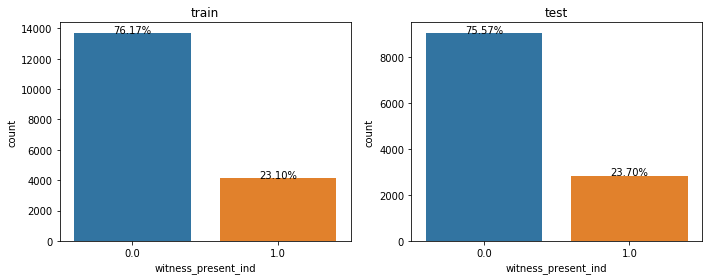

In [32]:
countplot('witness_present_ind')

### liab_prct

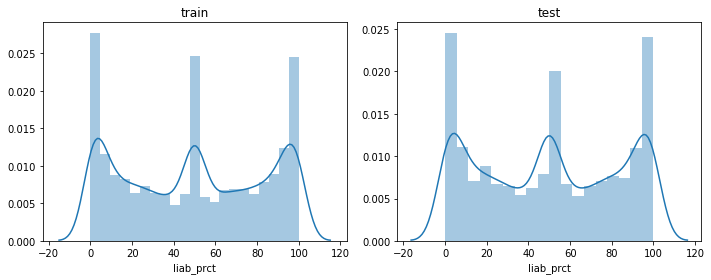

In [33]:
distplot('liab_prct')

### channel

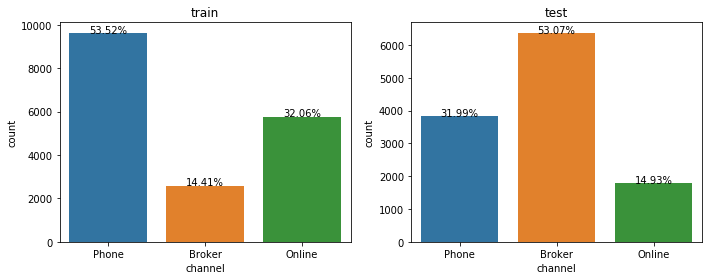

In [34]:
countplot('channel')

### policy_report_filed_ind

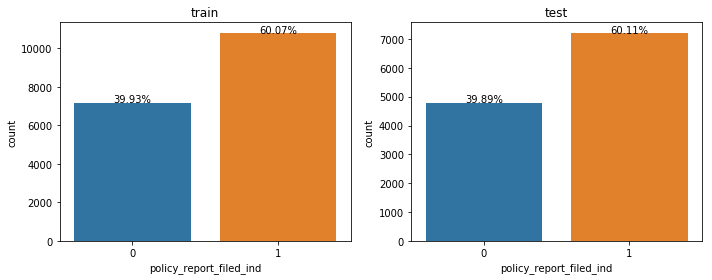

In [35]:
countplot('policy_report_filed_ind')

### vehicle_category

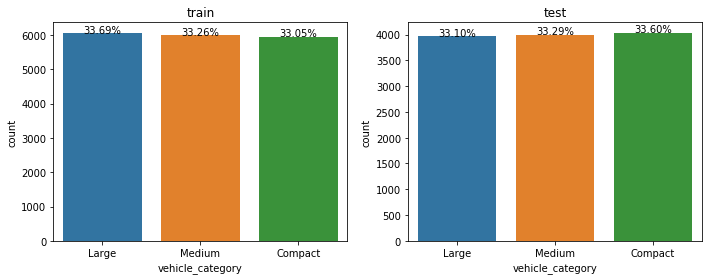

In [36]:
countplot('vehicle_category')

### vehicle_color

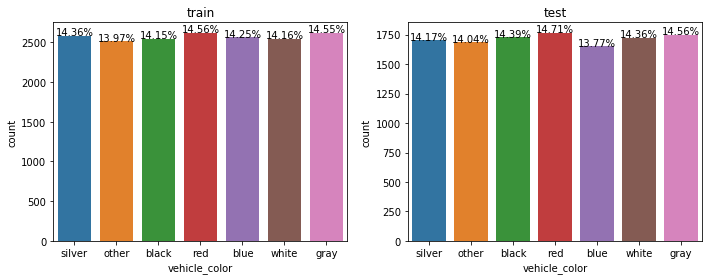

In [37]:
countplot('vehicle_color')

### vehicle_price

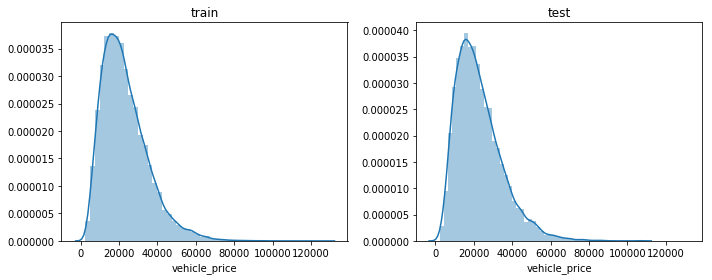

In [38]:
distplot('vehicle_price')

### vehicle_weight

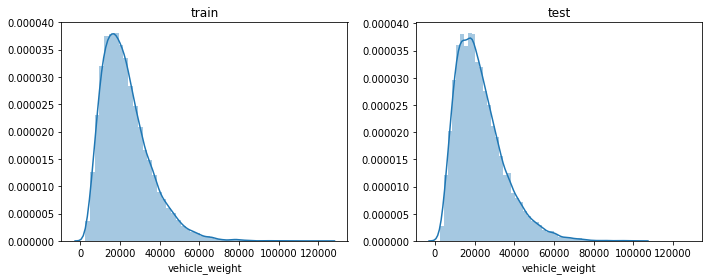

In [39]:
distplot('vehicle_weight')

### fraud

In [44]:
train['fraud'].value_counts()

 0    15179
 1     2816
-1        3
Name: fraud, dtype: int64

The target variable is supposed to be either 0 and 1. Observations that have fraud = -1 are abnormal and should be removed later.

## Correlations

The age of the driver and the annual income is highly correlated (r = 0.91), which makes sense because as you get older, you are more likely to get more education and more job experience, and hence a higher salary. Other than that, the variables are uncorrelated with each other. Therefore, dimension reduction techniques such as prinicpal component analysis are not required.

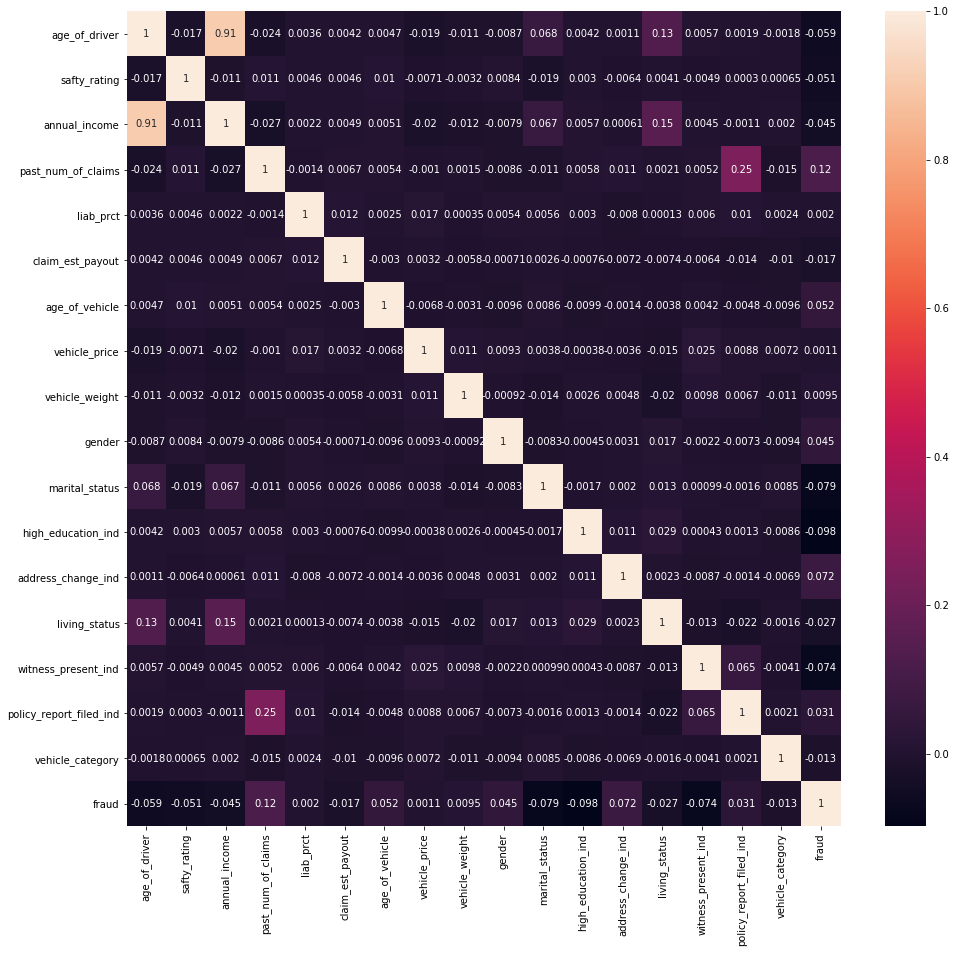

In [87]:
plt.figure(figsize=(16, 15))
numerical_features = ['age_of_driver', 'safty_rating', 'annual_income', 'past_num_of_claims', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight']
binary_features = ['gender', 'marital_status', 'high_education_ind', 'address_change_ind', 'living_status', 'witness_present_ind', 'policy_report_filed_ind']
train_corr = train[numerical_features + binary_features + ['vehicle_category', 'fraud']].corr()
sns.heatmap(train_corr, annot=True)

## Summary

First, there is a small percentage of missing values in both the training and the test sets. We will have to do some imputation. Other than living_status and channel, the features of the two datasets seem to come from the same distribution. For categorical variables, the categories showed up in the test set are also included in the training set, so there is no need to worry about extrapolation. Some abnormal data exist in age_of_driver, annual_income and fraud. Also, we may want to transform zip_code into latitude and longitude. All the variables are uncorrelated with each other, except the age of the driver and the annual income. 